# Prédire le prix des voitures
Prédire le prix des voitures en fonction d'un ensemble de variables interdépendantes : modèle, année, kilométrage, puissance fiscale et marque. la variable cible dans ce cas est le prix

### I mporter les librairies

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # pour diviser les données en données d'entraînement et de test
from sklearn.linear_model import LinearRegression

### Importer le dataset

In [55]:
data = pd.read_csv('../data/car_prices_dataset.csv')
X = data.iloc[:, :-1].values # toutes les lignes et toutes les colonnes sauf la dernière
y = data.iloc[:, -1].values # toutes les lignes et la dernière colonne

data

,Année,Kilométrage,Nb chevaux,Marque,Prix
0,2000,239361,480,Mercedes,22031.95
1,2007,74036,176,Nissan,15098.20
2,2012,124047,313,BMW,39447.65
3,2017,234491,426,Renault,39575.45
4,2000,274886,532,BMW,22855.70
...,...,...,...,...,...
195,2015,127176,450,Mercedes,46141.20
196,2003,57301,523,Volkswagen,33284.95
197,2001,60708,435,BMW,28714.60
198,2012,130089,582,BMW,52595.55


### Gérer les variables catégoriques
il faut traiter ces donnees categoriques afin de l'utiliser se forme des equations dans les algorithmes de ML, cette operation s'appelle l'encodage des variables; pour cela on va utiliser OneHotEncoder et ColumnTransformer pour encoder la marque sous forme de donnees numerique

In [77]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([("Brand", OneHotEncoder(), [3])], remainder = 'passthrough') # 3 est l'index de la colonne à encoder
X = ct.fit_transform(X) # on encode et on remplace X par les colonnes encodées

X[0]

array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2007, 74036, 176],
      dtype=object)

### Diviser le dataset

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # on divise les données en données d'entraînement et de test

### Construire le Modele

In [56]:
from sklearn.impute import SimpleImputer # pour remplacer les valeurs manquantes
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # on remplace les valeurs manquantes par la moyenne pour ne pas affecter les résultats
x_train = imputer.fit_transform(x_train) # on remplace les valeurs manquantes dans x_train
x_test = imputer.transform(x_test)

regressor = LinearRegression()
regressor.fit(x_train, y_train) # on entraîne le modèle

LinearRegression()

### Faire des predictions

In [44]:
y_pred = regressor.predict(x_test) # on prédit les données qui se trouve dans la base de test

### comparaison entre les valeurs prédites et les valeurs réelles

Text(0, 0.5, 'Valeurs prédites (y_pred)')

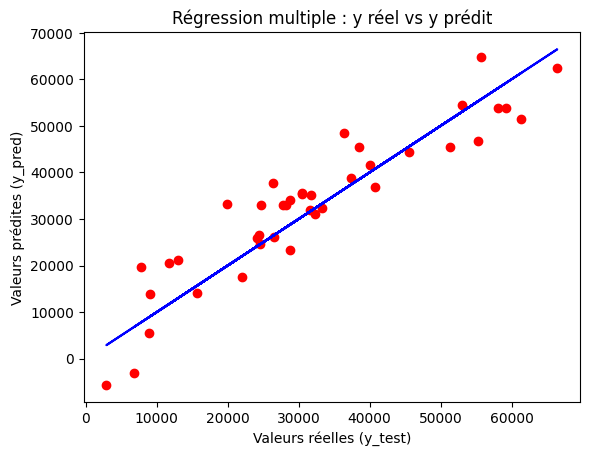

In [78]:
plt.scatter(y_test, y_pred, color='red')  # points des prédictions
plt.plot(y_test, y_test, color='blue')  # droite d'équation y = x

plt.title("Régression multiple : y réel vs y prédit")
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Valeurs prédites (y_pred)")

### Calculer le score

In [75]:
regressor.score(x_test, y_test)

0.8450304653118583